**Antes de iniciar a implementação do YOLOv8n precisamos instalar a biblioteca ultralytics, a qual é baseada no framework YOLO e é utilizada em tarefas de visão computacional, como detecção de objetos, segmentação de imagens e classificação de imagens.**



In [18]:
!pip install ultralytics


**Agora podemos importá-la no código para utilizar o framework:**

In [19]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 89.2MB/s]


**Após isso criamos uma variável que receberá o modelo YOLO, e também referenciamos uma imagem para que seja feita a detecção:**

In [20]:
results = model('/content/frutas e legumes.jpg')


image 1/1 /content/frutas e legumes.jpg: 640x640 1 banana, 2 apples, 10 oranges, 2 broccolis, 554.0ms
Speed: 12.2ms preprocess, 554.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)


A variável ***results*** possui todas as detecções na imagem. Portanto, criaremos um laço de repetição para cada um dos resultados com a variável ***result*** e chamaremos as caixas para delimitação. Por fim, salvamos o resultado desse laço de repetição de detecções como uma nova imagem chamada result.jpg:

In [21]:
for result in results:
  boxes = result.boxes
  result.save(filename='result.jpg')

Antes de mostrar a imagem com as detecções feitas pelo YOLOv8, utilizamos a biblioteca matplotlib.pyplot e matplotlib.image para mostrar a imagem original, sem alterações.

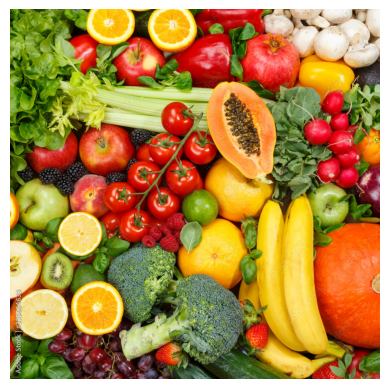

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = '/content/frutas e legumes.jpg'
image = mpimg.imread(img)
plt.imshow(image)
plt.axis('off')
plt.show()

Agora, finalmente, utilizamos as mesmas bibliotecas para mostrar a imagem 'results.jpg', a qual foi criada a partir de detecções feitas com o YOLOv8 na imagem principal.

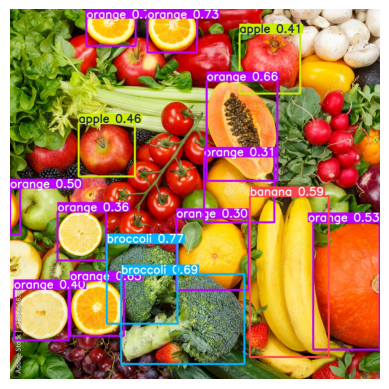

In [23]:
img = '/content/result.jpg'
image = mpimg.imread(img)
plt.imshow(image)
plt.axis('off')
plt.show()

A partir da imagem 'results.jpg' pode-se observar que o YOLOv8 conseguiu detectar e classificar 13 frutas e legumes, sendo dentre eles 10 *True Positives* e 3 *False Positives*. Portanto, para avaliar sua performance aplicamos a métrica de precisão:

In [24]:
TP = 10  # Detecções corretas
FP = 3   # Detecções incorretas

precision = TP / (TP + FP)
print(f"Precisão: {precision:.2f}")

Precisão: 0.77


**Por fim, nota-se que o modelo YOLOv8 obteve uma precisão de 77%, o que indica uma performance aceitável na detecção e classificação de frutas e vegetais misturados.**